### Define Ansatz Circuit

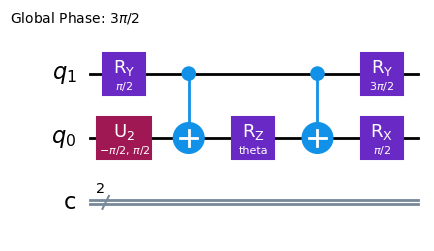

In [12]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2
from math import pi

backend = AerSimulator()
qc = QuantumCircuit(2,2)
qc.name = 'H2 STO-3G g1-g3'
theta = Parameter('theta')

qc.x(0)
qc.ry(np.pi/2,1)
qc.rx(3*np.pi/2,0)
qc.cx(1,0)
qc.rz(theta,0)
qc.cx(1,0)
qc.ry(3*np.pi/2,1)
qc.rx(np.pi/2,0)

pm = generate_preset_pass_manager(target=backend.target, optimization_level=1)
qc2_aer = pm.run(qc)
qc2_aer.draw()

### Parameters

In [19]:
angles = [ [pi/4], [pi/3] ]

### Observables

In [14]:
obsv_list = [
    [SparsePauliOp(['II'], [-0.5597])],
    [SparsePauliOp(['IZ'], [ 0.1615])],
    [SparsePauliOp(['ZI'], [-0.0166])],
    [SparsePauliOp(['ZZ'], [ 0.4148])],
    [SparsePauliOp(['YY'], [ 0.1266])],
    [SparsePauliOp(['XX'], [ 0.1266])]
]

In [15]:
estimator = EstimatorV2(backend=backend)

In [37]:
angles = [-pi/2]

In [42]:
job = estimator.run([(qc, obsv_list, angles)])
exp_vals_aer = job.result()[0].data.evs
print(exp_vals_aer)

[[-5.5970000e-01]
 [ 2.5234375e-03]
 [ 2.5937500e-04]
 [-4.1480000e-01]
 [ 1.2660000e-01]
 [ 1.2660000e-01]]


In [39]:
np.sum(exp_vals_aer)

-0.7196614799999999

three lists each with three separate results, each of the lists corresponds to the results to each of the observables, and the values within each list correspond to the expectation value calculated for each of the different circuits that had different parameter values